## Observations and Insights 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#  Read and study data on cvs files
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
#  Read and study data on cvs files
study_results_path = "data/Study_results.csv"
study_results = pd.read_csv(study_results_path)
study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
result_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")


In [6]:
# Display the data table for preview
result_df = pd.DataFrame(result_df)
result_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.

number_mice_df = len(mouse_metadata["Mouse ID"].value_counts())
number_mice_df = [{"Total Number of Mice": number_mice_df}]
number_mice_df = pd.DataFrame(number_mice_df)
number_mice_df


,Total Number of Mice
0,249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = result_df.loc[result_df.duplicated(subset = ["Mouse ID", "Timepoint",]) ,"Mouse ID"].unique()
duplicate_df = [{"Duplicate mice": duplicate_df}]
duplicate_df = pd.DataFrame(duplicate_df)
duplicate_df




,Duplicate mice
0,[g989]


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_g989 = result_df[result_df['Mouse ID'] == 'g989']
mice_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = result_df[result_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean_df = len(clean_df["Mouse ID"].value_counts())
number_mice_clean_df = [{"Number of mice in the clean DataFrame": number_mice_clean_df}]
number_mice_clean_df = pd.DataFrame(number_mice_clean_df)
number_mice_clean_df

,Number of mice in the clean DataFrame
0,248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = mean, median, variance, standard_deviation, sem
summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": variance,
                           "Standard deviation": standard_deviation,
                           "SEM":sem})
summary_df


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
second_summary_df = clean_df.groupby("Drug Regimen").agg(Mean = ("Tumor Volume (mm3)", "mean"), 
                                                         Median = ("Tumor Volume (mm3)", "median"),
                                                         Variance = ("Tumor Volume (mm3)", "var"),
                                                         Standard_Deviation = ("Tumor Volume (mm3)", "std"),
                                                         SEM = ("Tumor Volume (mm3)", "sem"))

# This method produces everything in a single groupby function
second_summary_df

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

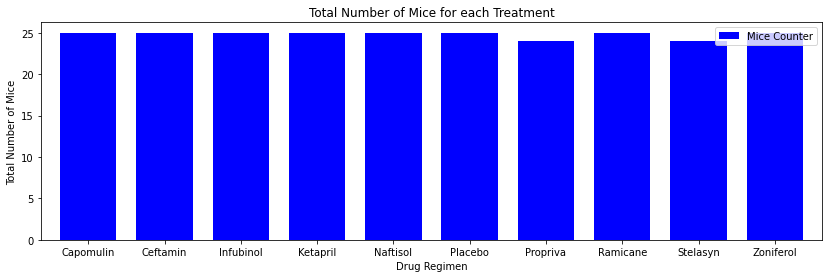

In [14]:
#Show the total number of mice for each treatment throughout the course of the study using pandas. 
mice_regimen = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mice_regimen

# Generate a bar plot
mice_regimen_plot = mice_regimen.plot.bar(x = "Drug Regimen", 
                                          y = "Mouse ID", 
                                          facecolor ="blue", 
                                          figsize=(14,4), 
                                          width=0.74, rot=0, 
                                          label = "Mice Counter")

# Format plot
plt.legend()
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.title('Total Number of Mice for each Treatment')
plt.show()

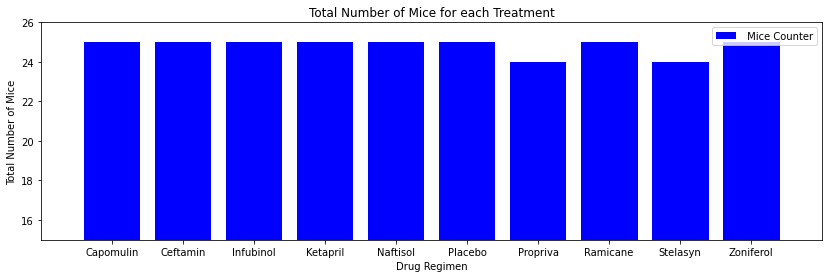

In [15]:
# Show the total number of mice for each treatment throughout the course of the study using pyplot.
number_mice = mice_regimen.values
number_mice

# Generate a bar plot
x_axis = np.arange(len(number_mice))
drug_regimen = mice_regimen.index
tick_locations = [value for value in x_axis]

# Format plot
plt.figure(figsize=(14,4))
plt.bar(x_axis, number_mice, color="blue", alpha=1, align="center", label = " Mice Counter")
plt.xticks(tick_locations, drug_regimen)
plt.xlim(-1, len(x_axis))
plt.ylim(15, max(number_mice)+1)
plt.legend()
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()

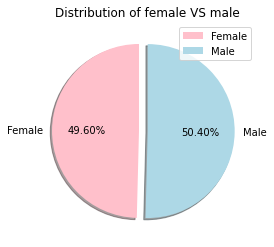

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice = clean_df.groupby("Sex")["Mouse ID"].nunique()
gender_mice
gender_mice.plot.pie(autopct='%1.2f%%', explode=[0.1,0], 
                     colors=['pink','lightblue'], 
                     shadow=True, 
                     startangle=90, 
                     legend=True)
plt.ylabel ("")
plt.title("Distribution of female VS male")
plt.show()


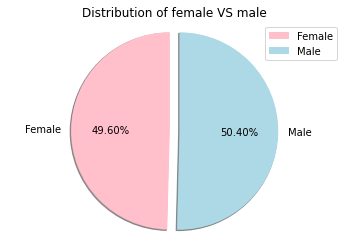

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice2 = gender_mice.values
gender = clean_df.groupby("Sex")["Mouse ID"].nunique()
labels = gender.index
gender_mice2
plt.pie(gender_mice2, autopct='%1.2f%%', labels=labels, explode=[0.2,0], colors=['pink','lightblue'], shadow=True, startangle=90, radius=2,)
plt.axis("equal")
plt.ylabel("")
plt.title("Distribution of female VS male")
plt.legend(labels)
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin Ramicane, Infubinol, and Ceftamin
tumor_volume = clean_df.groupby(['Mouse ID', 'Drug Regimen']).agg(Timepoint = ('Timepoint', 'max'))

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = tumor_volume.merge(clean_df, how = 'inner', on = ['Mouse ID', 'Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatment

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Then locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for value in treatment:
    tumor_volumes = final_tumor_volume['Tumor Volume (mm3)'].loc[final_tumor_volume['Drug Regimen'] == value]
    empty_list.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {value} the interquartile range is: {iqr}")
    print(f"For {value} values below {lower_bound} could be outliers.")
    print(f"For {value} values above {upper_bound} could be outliers.\n")

For Capomulin the interquartile range is: 7.781863460000004
For Capomulin values below 20.70456164999999 could be outliers.
For Capomulin values above 51.83201549 could be outliers.

For Ramicane the interquartile range is: 9.098536719999998
For Ramicane values below 17.912664470000003 could be outliers.
For Ramicane values above 54.30681135 could be outliers.

For Infubinol the interquartile range is: 11.477135160000003
For Infubinol values below 36.83290494999999 could be outliers.
For Infubinol values above 82.74144559000001 could be outliers.

For Ceftamin the interquartile range is: 15.577752179999997
For Ceftamin values below 25.355449580000002 could be outliers.
For Ceftamin values above 87.66645829999999 could be outliers.



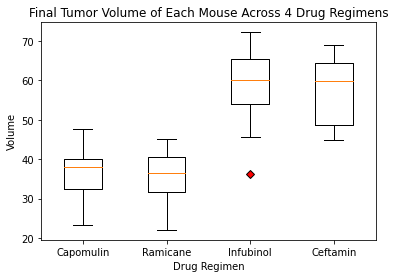

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plt = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume of Each Mouse Across 4 Drug Regimens')
ax.set_ylabel('Volume')
ax.boxplot(empty_list, flierprops=box_plt)
ax.set_xticklabels(treatment)
ax.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

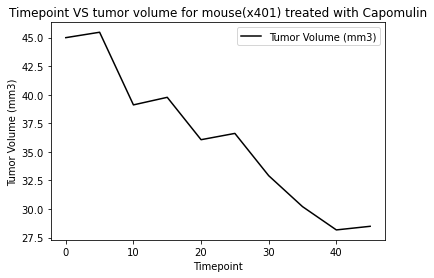

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plt = clean_df.loc[(clean_df["Mouse ID"] == "x401")]
line_plt.plot(x='Timepoint',y='Tumor Volume (mm3)', color="black")
plt.title("Timepoint VS tumor volume for mouse(x401) treated with Capomulin")
plt.ylabel('Tumor Volume (mm3)')

Text(0.5, 0, 'Weight (g)')

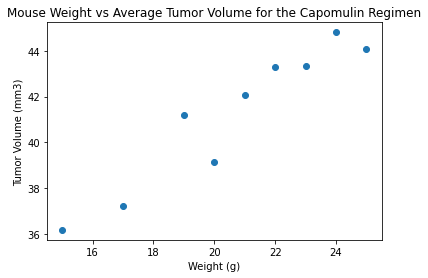

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plt = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_capomulin = scatter_plt.groupby(['Weight (g)']).mean()
avg_capomulin = avg_capomulin.reset_index()
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

## Correlation and Regression

In [96]:
#Create variables and DataFrame for mouse weight and average tumor volume for the Capomulin regimen
data_df = avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"]
data_df = pd.DataFrame(data_df)
data_df
df_transposed = data_df.T # or df.transpose()
df_transposed #shape = (9, 2)
dataset = df_transposed
dataset



,Weight (g),Tumor Volume (mm3)
0,15.0,36.182040
1,17.0,37.214133
2,19.0,41.182391
3,20.0,39.141053
4,21.0,42.088700
5,22.0,43.288490
6,23.0,43.341051
7,24.0,44.805810
8,25.0,44.062109


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


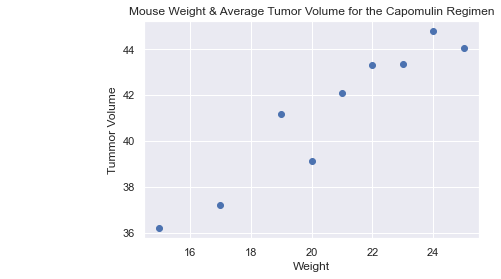

In [104]:
# Calculate the correlation coefficient and linear regression model 

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values
linear_regressor = LinearRegression()  # create object
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.scatter(X, Y)
plt.title('Mouse Weight & Average Tumor Volume for the Capomulin Regimen')
plt.annotate(Y_pred,(10,40),fontsize=10,color="red")
plt.xlabel('Weight')
plt.ylabel('Tummor Volume')

# plt.plot(X, linear_regressor,'r-')

plt.show()